In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

sim = pd.read_csv("sim.csv")

In [88]:
for index, row in sim.iterrows():
    if row.drone == 0:
        terrestrial_dRSRP.append(row.dRSRP) 
        terrestrial_RSSI.append(row.RSSI)
    else:
        drone_dRSRP.append(row.dRSRP) 
        drone_RSSI.append(row.RSSI)

In [89]:
for index, row in sim.iterrows():
    if row.drone == 0:
        terrestrial_dRSRP.append(row.dRSRP) 
        terrestrial_RSSI.append(row.RSSI)
    else:
        drone_dRSRP.append(row.dRSRP) 
        drone_RSSI.append(row.RSSI)

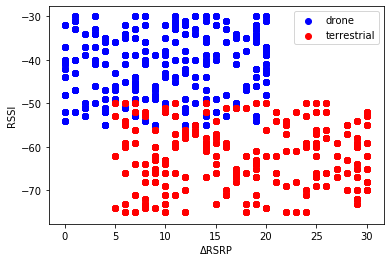

In [90]:
plt.xlabel('ΔRSRP')
plt.ylabel('RSSI')
ax = plt.gca()
ax.scatter(drone_dRSRP, drone_RSSI, color="b", label = 'drone')
ax.scatter(terrestrial_dRSRP, terrestrial_RSSI, color="r", label = 'terrestrial')
ax.legend()

In [91]:
y = sim.drone.copy()
X = sim.drop(['drone'], axis=1)
features = sim.columns
features = list(features.drop(['drone']))

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [93]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [96]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']

In [97]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.975
Precision: 0.9545454545454546
Recall: 1.0


Feature: RSSI: , Score: 0.12429
Feature: dRSRP: , Score: 0.03616
Feature: RSRQ: , Score: 0.83954


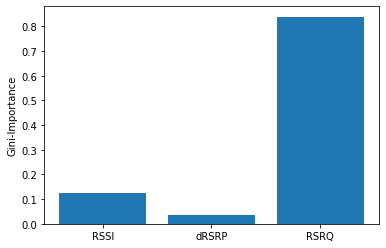

In [98]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s: , Score: %0.5f' % (features[i],v))
# plot feature importance
plt.bar(features, importance)
plt.ylabel('Gini-Importance')
plt.show()

Text(0.5, 15.0, 'Predicted')

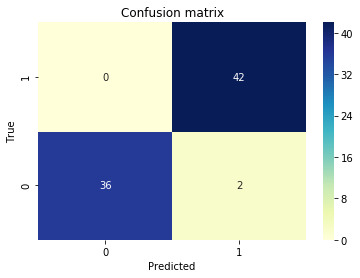

In [99]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')